Le but de cette étude est de prédire si un patient sera victime d'un avc ou pas en se basant sur les paramètre comme l'âge, l'imc etc. Les données utilisées sont issues de Kaggle et disponibles à l'addresse suivant : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Une brève description de la base:

* **id** : L'identifiant de l'individu
* **gender** : Le genre
* **age** : L'age
* **hypertension** : Hypertension
* **heart_disease** : Maladie cardiaque
* **ever_married** : Statut marital
* **work_type** : Le secteur d'activité
* **Residence_type** :  Localité du résident
* **avg_glucose_level** : Le niveau moyen de glucose dans le sang
* **bmi** : Indice de masse corporelle (imc = $\frac{masse}{taille^2}$)
* **smoking_status** : Statut de fumeur
* **stroke** : Accident vasculaire cérebrale(avc)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
df_avc = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df_avc.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df = df_avc.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

- 12 variables et 5110 individus.

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Lage moyen des patients est de 43 ans, avec un niveau moyen de glucose de 106 et un imc moyen de 28,89.

In [ ]:
df.describe(include=['O'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


- **id** sera supprimé de la base

In [ ]:
df.drop('id',axis=1,inplace=True)

## Analyse exploratoire des données

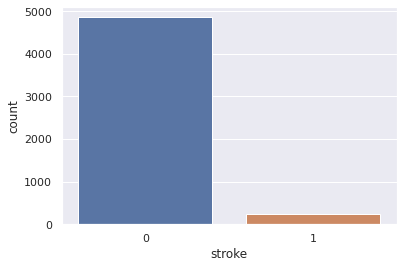

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(x='stroke',data=df);

In [ ]:
100*df['stroke'].value_counts(normalize=True)

0    95.127202
1     4.872798
Name: stroke, dtype: float64

- Une proportion désequilibrée est constatée dans l'échantillon. Les personnes victimes d'avc représente 4,87% de la population étudiée.

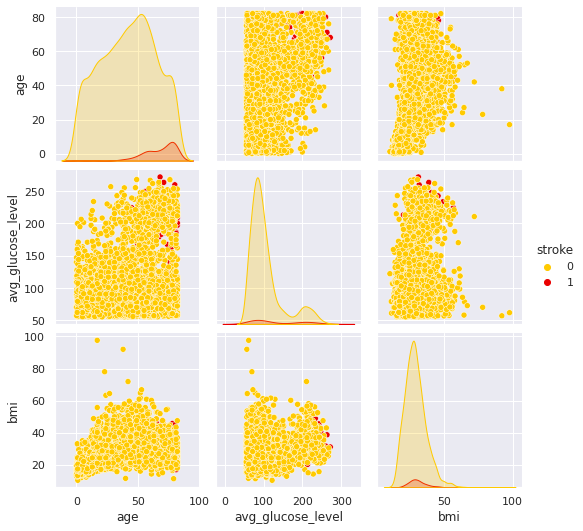

In [ ]:
var1 = ['age', 'avg_glucose_level', 'bmi', 'stroke']
sns.pairplot(data=df[var1],hue='stroke',palette='hot_r');

* Les personnes victimes de la maladie ont général un niveau de glucose élevé et un imc supérieur à 40. C'est généralement des personnes agées avec des ages supérieurs à 40 ans. Une séparation linéaire peut être envisagé.

In [ ]:
var_num =  ['age', 'avg_glucose_level','bmi']
var_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

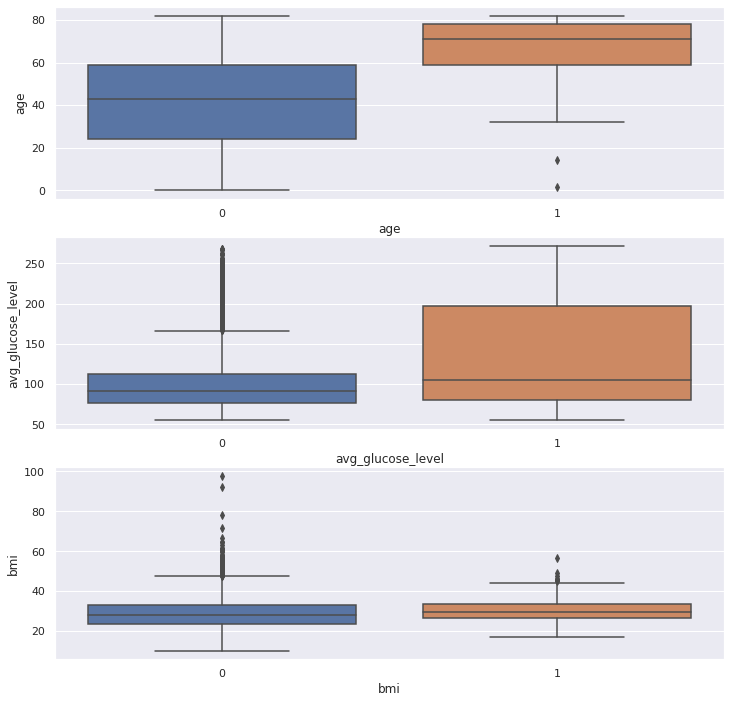

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12,12))
for i,var in zip(np.arange(1,4),var_num):
  plt.subplot(3,1,i)
  sns.boxplot(data=df,x='stroke',y=var);
  plt.xlabel(var);

- Il semble avoir une relation entre l'age et la maladie. Les victimes d'avc ont majoritairement plus de 60 ans.
- Le taux moyen de glucose dans le sang est élevé pour les victimes d'avc.

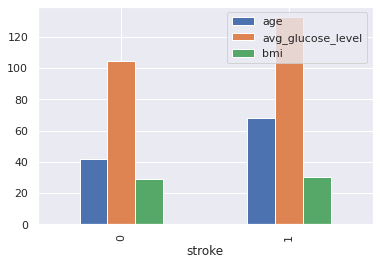

In [ ]:
df.groupby('stroke').mean()[var_num].plot(kind='bar');

- Lorsqu'une personne est victime d'avc, les paramètres comme le taux de glucose, l'age sont généralement supérieurs aux personnes saines.

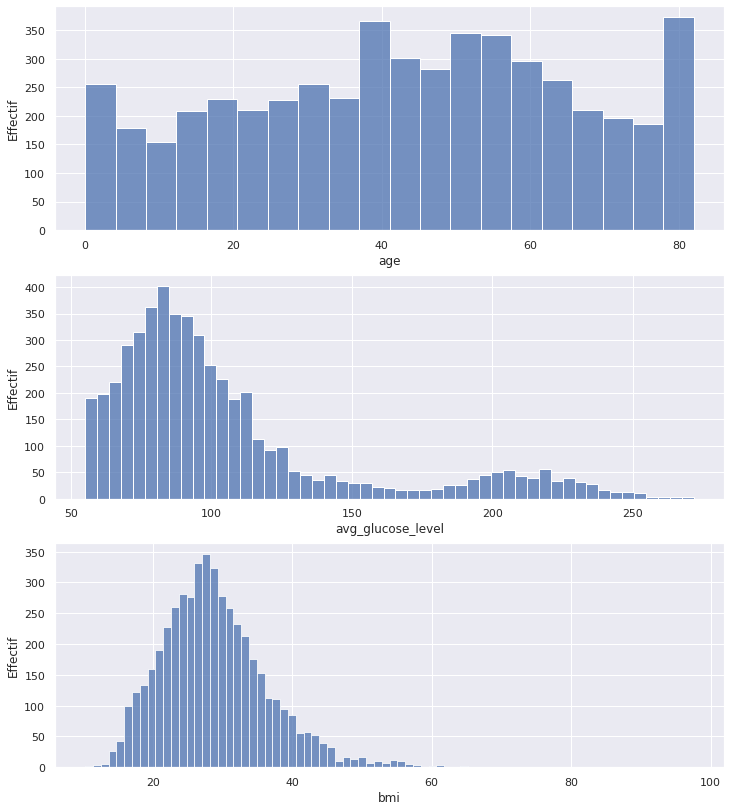

In [ ]:
plt.figure(figsize=(12,14))
for i,var in zip(np.arange(1,4),var_num):
  plt.subplot(3,1,i)
  sns.histplot(data=df,x=var);
  plt.xlabel(var);
  plt.ylabel('Effectif');

* La variable **bmi** semble être normalement distribuée. 

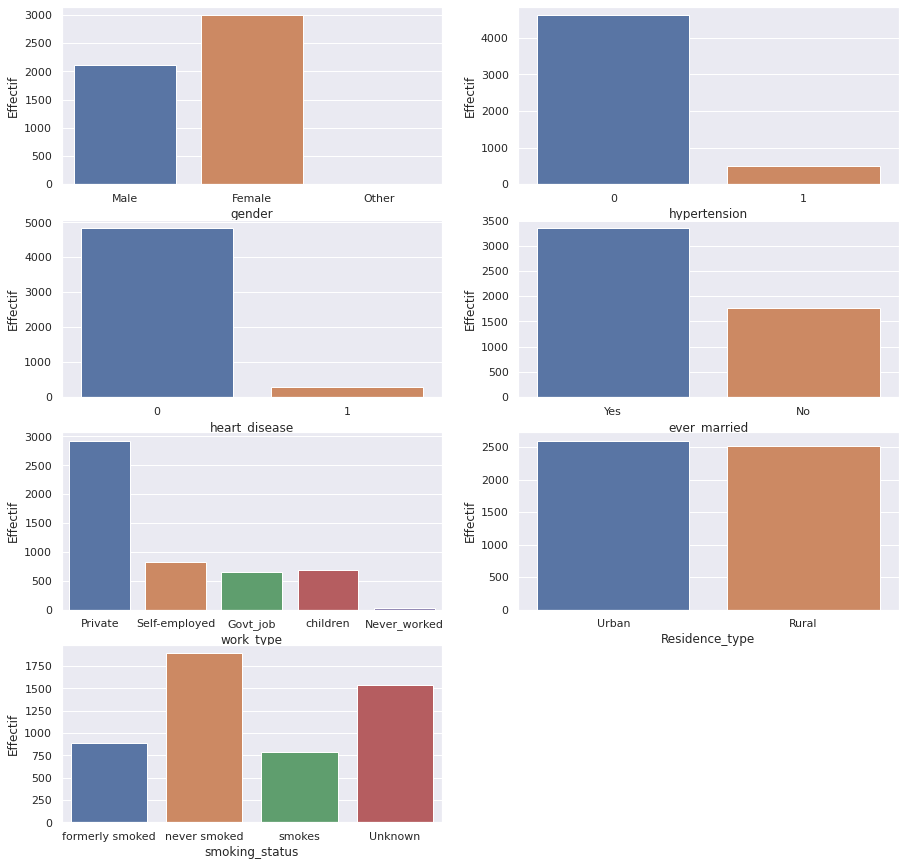

In [ ]:
plt.figure(figsize=(15,15))

for i,var in zip(np.arange(1,8),var_cat):
  plt.subplot(4,2,i)
  sns.countplot(data=df,x=var);
  plt.xlabel(var);
  plt.ylabel('Effectif');

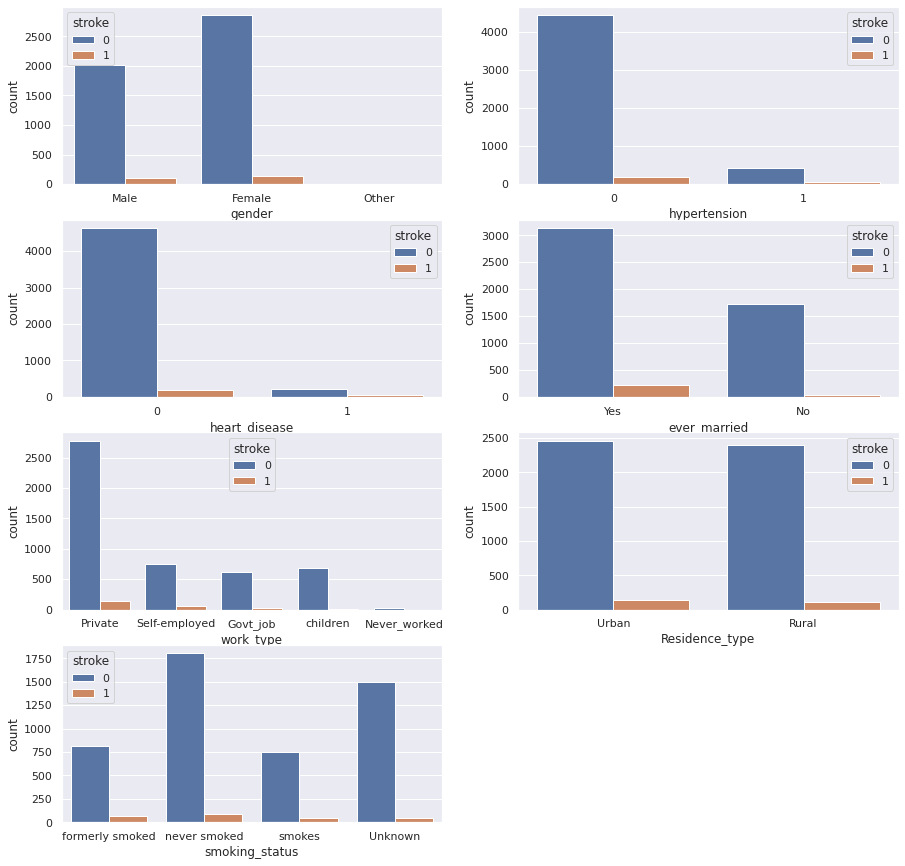

In [ ]:
plt.figure(figsize=(15,15))

for i,var in zip(np.arange(1,8),var_cat):
  plt.subplot(4,2,i)
  sns.countplot(data=df,x=var,hue='stroke');

- L'effectif des personnes souffrant d'un avc étant très réduit, ces graphiques ne permettent pas de savoir quelle variable a un relation avec l'avc.

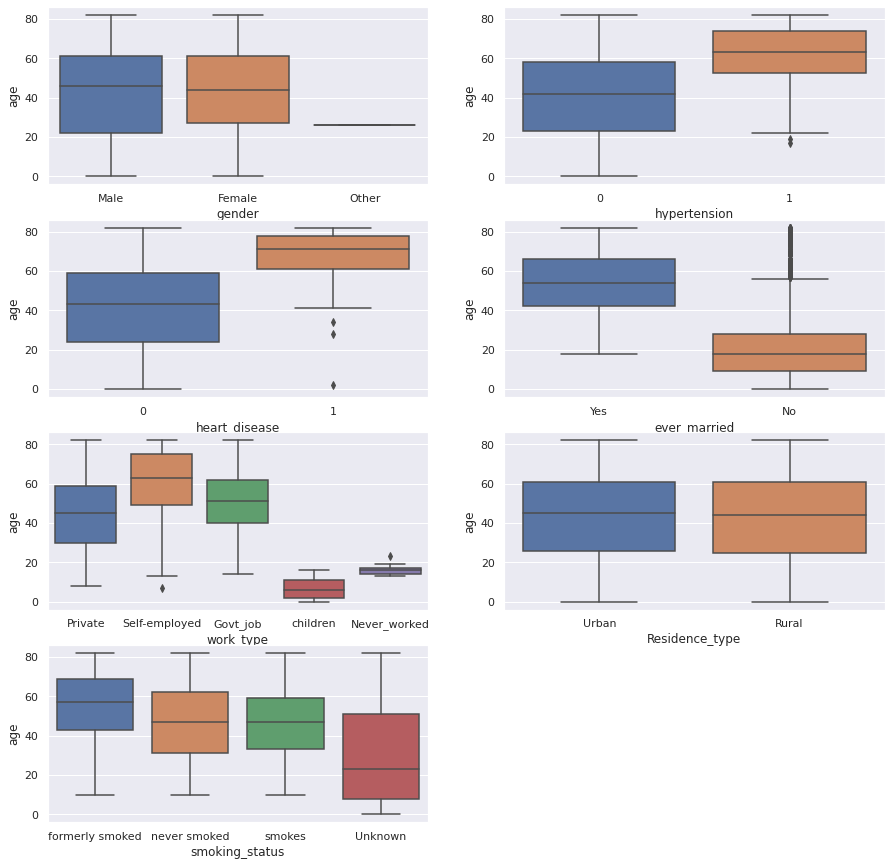

In [ ]:
plt.figure(figsize=(15,15))

for i,var in zip(np.arange(1,8),var_cat):
  plt.subplot(4,2,i)
  sns.boxplot(data=df,x=var,y='age');

- On remarque que certaines maladies apparaissent avec l'age.Les personnes souffrant d'une hypertension ou d'une maladie cardiaque ont généralament plus de 60 ans.


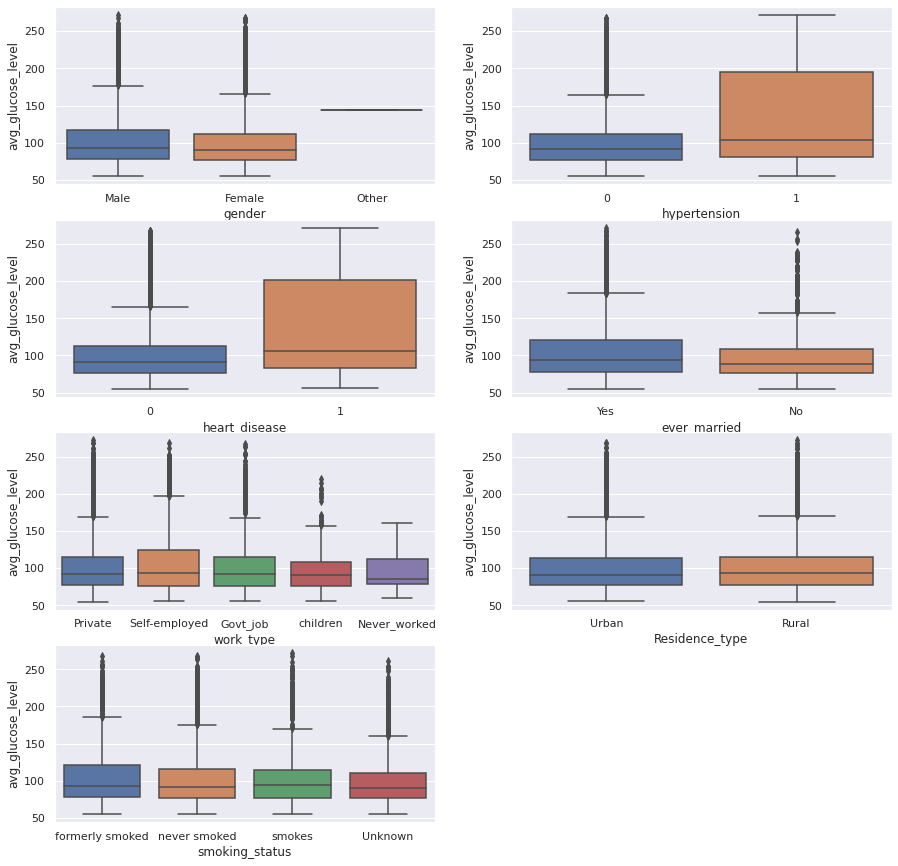

In [ ]:
plt.figure(figsize=(15,15))

for i,var in zip(np.arange(1,8),var_cat):
  plt.subplot(4,2,i)
  sns.boxplot(data=df,x=var,y='avg_glucose_level');

* On observe une différence très nette entre du niveau de glucose selon l'état de santé de l'individu. Le niveau de glucose est relativement élevé pour les personnes  souffrant d'une hypertension ou d'une maladie cardiaque.

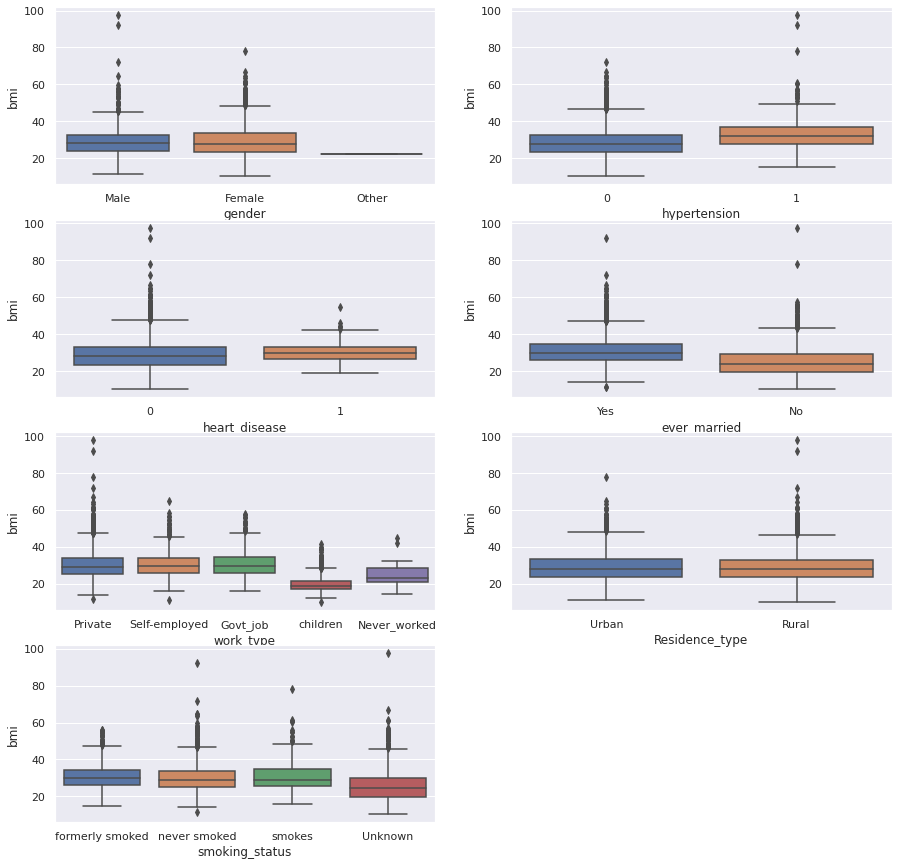

In [ ]:
plt.figure(figsize=(15,15))
 
for i,var in zip(np.arange(1,8),var_cat):
  plt.subplot(4,2,i)
  sns.boxplot(data=df,x=var,y='bmi');

* Une différence semble se dessiner entre les personnes souffrant d'une hypertension ou d'une maladie cardiaque selon le niveau du bmi. Les personnes souffrantes ont un niveau de bmi supérieur aux autres en moyenne.

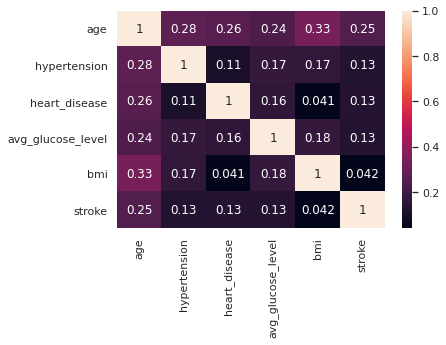

In [ ]:
sns.heatmap(df.corr(),annot=True);

- Pas de corrélation particulière

## Data preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

### Valeurs manquantes et data processing

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
mediane = df['bmi'].median()
df['bmi'].fillna(mediane,inplace = True)

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

- On a une troisième modalité apparait dans la colonne genre. Cette modalité sera remplacée par la modalité fréquente qui est **Female**.

In [ ]:
df['gender'] = df['gender'].replace('Other','Female')

## Preprocessing

In [ ]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,stratify=y)

In [ ]:
y_train.value_counts(normalize=True)

0    0.951212
1    0.048788
Name: stroke, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.951393
1    0.048607
Name: stroke, dtype: float64

In [ ]:
onehot = OneHotEncoder()

In [ ]:
catvar = ['gender','smoking_status','Residence_type','work_type','ever_married']
numvar = ['age','avg_glucose_level','bmi']

In [ ]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

In [ ]:
processor = make_column_transformer((num_pipeline,numvar),(cat_pipeline,catvar),remainder ='passthrough')

## Modélisation

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
def evaluation(model,X_train=X_train, y_train=y_train,X_test=X_test, y_test=y_test):
  fit_model = model.fit(X_train,y_train)
  pred_train = fit_model.predict(X_train)
  y_pred = fit_model.predict(X_test)
  accuracy_train = metrics.accuracy_score(y_train, pred_train)
  accuracy_test = metrics.accuracy_score(y_test, y_pred)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
  auc_test = metrics.auc(fpr, tpr)
  print(metrics.confusion_matrix(y_test,y_pred))
  print(metrics.classification_report(y_test,y_pred))
  print(auc_test)

### SVM

In [ ]:
model = make_pipeline(processor,svm.SVC(kernel='linear',C=0.1,class_weight = "balanced"))

* Nous allons proceder à l'évaluation de notre modèle.

In [ ]:
evaluation(model=model)

[[1181  424]
 [  13   69]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      1605
           1       0.14      0.84      0.24        82

    accuracy                           0.74      1687
   macro avg       0.56      0.79      0.54      1687
weighted avg       0.95      0.74      0.81      1687

0.7886444799027429


- Modèle globalement bon avec un AUC de **78,86%**. On remarque qu'on a beaucoup de faux-positifs(424).

### RandomForest

In [ ]:
model1 = make_pipeline(processor,RandomForestClassifier(class_weight = "balanced"))

In [ ]:
evaluation(model=model1)

[[1601    4]
 [  82    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1605
           1       0.00      0.00      0.00        82

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.91      0.95      0.93      1687

0.4987538940809969


- Avec le RandomForest on obtient un accuracy de **95%** et un AUC de **49,87%**. 

### GradientBoosting

In [ ]:
model2 = make_pipeline(processor,GradientBoostingClassifier())

In [ ]:
evaluation(model=model2)

[[1597    8]
 [  81    1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1605
           1       0.11      0.01      0.02        82

    accuracy                           0.95      1687
   macro avg       0.53      0.50      0.50      1687
weighted avg       0.91      0.95      0.93      1687

0.5036053491376036


- On a un score de 95% . Cependant le modèle ne réussit à prédire pas à prédire les cas d'avc.
- Les méthodes basées sur les arbres n'arrivent pas à bien prédire.

### Régression logistique

In [ ]:
logist = make_pipeline(processor, LogisticRegression(penalty='l2',class_weight='balanced'))

In [ ]:
evaluation(logist)

[[1184  421]
 [  14   68]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      1605
           1       0.14      0.83      0.24        82

    accuracy                           0.74      1687
   macro avg       0.56      0.78      0.54      1687
weighted avg       0.95      0.74      0.82      1687

0.7834814983663856


- On obtient des performances globalement similaires au SVM.

### Recherche du meilleur modèle

### SVM

In [ ]:
grid_p = {'svc__C' : [1e-2,0.05,0.1,0.5],'svc__kernel': ['linear','rbf'] }
grid = GridSearchCV(model,param_grid=grid_p,scoring='roc_auc',cv=4)

In [ ]:
grid_cv=grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

{'svc__C': 0.01, 'svc__kernel': 'linear'}

In [ ]:
ypred = grid.predict(X_test)
metrics.confusion_matrix(y_test,ypred)

array([[1146,  459],
       [  11,   71]])

In [ ]:
print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1605
           1       0.13      0.87      0.23        82

    accuracy                           0.72      1687
   macro avg       0.56      0.79      0.53      1687
weighted avg       0.95      0.72      0.80      1687



In [ ]:
metrics.roc_auc_score(y_test,ypred)

0.7899361750626852

### Régression logistique

In [ ]:
grid_l = {'logisticregression__C' : [1e-1,5,20,100]}

In [ ]:
grid = GridSearchCV(logist,param_grid=grid_l,scoring='roc_auc',cv=4)
grid_cv=grid.fit(X_train,y_train)
grid.best_params_

{'logisticregression__C': 0.1}

In [ ]:
ypred = grid.predict(X_test)
metrics.confusion_matrix(y_test,ypred)

array([[1185,  420],
       [  13,   69]])

In [ ]:
print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1605
           1       0.14      0.84      0.24        82

    accuracy                           0.74      1687
   macro avg       0.57      0.79      0.54      1687
weighted avg       0.95      0.74      0.82      1687



In [ ]:
metrics.roc_auc_score(y_test,ypred)

0.789890585821746

##Conclusion

Une des difficulté de ce problème est lié au fait que les classes son déséquilibrées. La base contient moins de cas d'avc(moins 5%), cela rend la prédiction très difficile et l'utilisation des métriques comme l'accuracy n'est pas adapter. Le svm est un bon modèle pour prédire l'avc. Ce modèle nous permet d'avoir le meilleur score auc parmis les autres modèles. Toutefois nous obtenons un score relativement bas. Une bonne connaissance du domaine couplé d'une améliorer du pre-processing pourrait nous aider à améliorer ce score.